In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2
from tensorflow.keras.utils import to_categorical


In [ ]:
print("사용 가능 GPU 개수: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### 오후 특강 전에 여러분이 한번 도전해 보길 바라는 문제가 있습니다.

CIFAR-100이라는 100개의 label을 가진 dataset이 있습니다. 아래와 같이 데이터를 불러 올 수 있습니다.

이미지로부터 100개의 label중 하나를 예측하는 모델을 만들어보세요.

성능은 어떤가요?

ImageNet은 1000개의 label을 가진 데이터셋입니다. 어떻게 만들어야 할까요?

요즘 중국에서는 얼굴 인식으로 결제가 되는 시스템을 도입하고 있는데 

그렇다면 label을 몇개나 될까요? 어떻게 만들 수 있을까요?



In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [ ]:




# CIFAR-100 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

# 이미지 데이터 정규화
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

train_images.shape


169001437/169001437 [==============================] - 2s 0us/step


(50000, 3072)

In [ ]:
num_classes = 100

dropout_rate=0.1
l2_reg=0.0001

inputs = layers.Input(shape=train_images.shape[1])
x = layers.Dense(512, activation='relu', kernel_initializer='he_normal', kernel_regularizer=L2(l2_reg))(inputs)
x = layers.BatchNormalization()(x)
x = layers.Dropout(dropout_rate)(x)

x = layers.Dense(256, activation='relu', kernel_initializer='he_normal', kernel_regularizer=L2(l2_reg))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(dropout_rate)(x)

x = layers.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=L2(l2_reg))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(dropout_rate)(x)

outputs = layers.Dense(num_classes, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
model


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                             

In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

num_epochs = 50
batch_size = 256

history = model.fit(train_images, train_labels,
                    batch_size=batch_size, epochs=num_epochs,
                    validation_split = 0.2)

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 3.3181 - accuracy: 0.2466


[3.3181018829345703, 0.24660000205039978]

In [ ]:
pred_softmax = model(test_images)
pred = np.argmax(pred_softmax, axis = 1)
pred

array([ 8,  8, 45, ..., 96, 50, 45])

In [ ]:
index2name = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

In [ ]:
y_test = y_test.ravel()

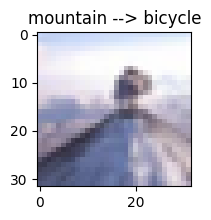

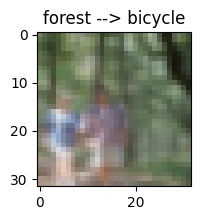

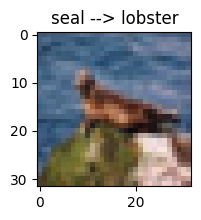

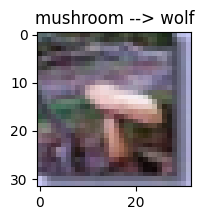

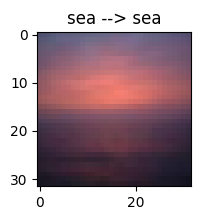

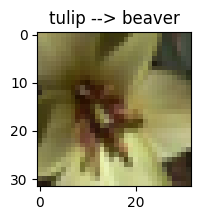

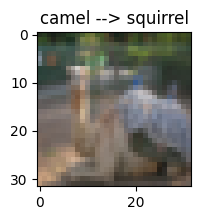

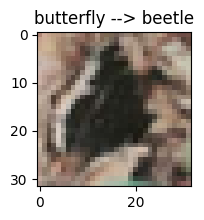

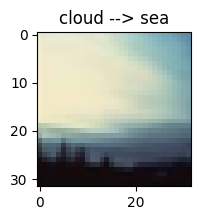

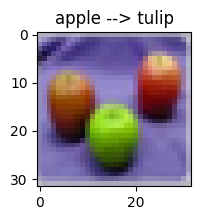

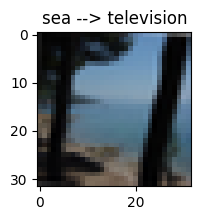

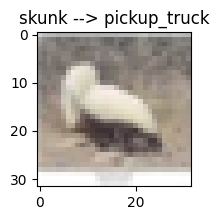

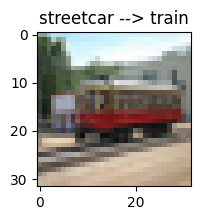

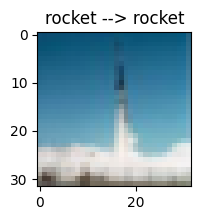

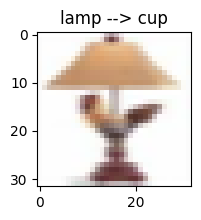

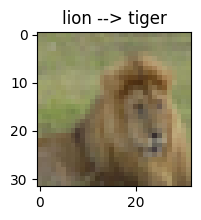

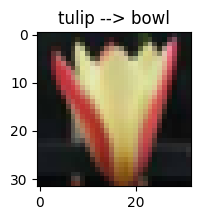

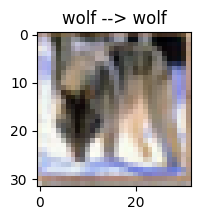

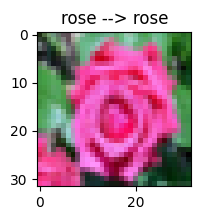

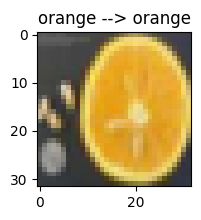

In [ ]:
from matplotlib import pyplot as plt
(_, _), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

for i in range(20):
    plt.figure(figsize=(2, 2))
    plt.imshow(x_test[i])
    true_label = index2name[y_test[i][0]]
    pred_label = index2name[pred[i]]
    plt.title(f'{true_label} --> {pred_label}')
    plt.show()